## Mounting Google-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

## Step 1: Load Dataset from Google Drive


In [6]:
# Importing Essential Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline

In [7]:
# Checking if the data is loaded properly by dispalying first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Display Shape of the dataset
df.shape

(891, 12)

## Step 2: Dataset Overview – Dtypes, Nulls, Structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## Step 3: Summary Statistics – Mean, Median, Std, etc.


In [12]:
# Display summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Median and Standard Deviation separately
df.median(numeric_only=True)
df.std(numeric_only=True)

,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429


- 'Fare' is highly skewed (mean >> median) with a max of 512 → outliers likely.
- 'Age' is fairly symmetric (mean ≈ median), spread seems reasonable.
- Most passengers had no siblings/spouses (SibSp) or parents/children (Parch) aboard.

## Step 4: Univariate Visualizations – Histograms


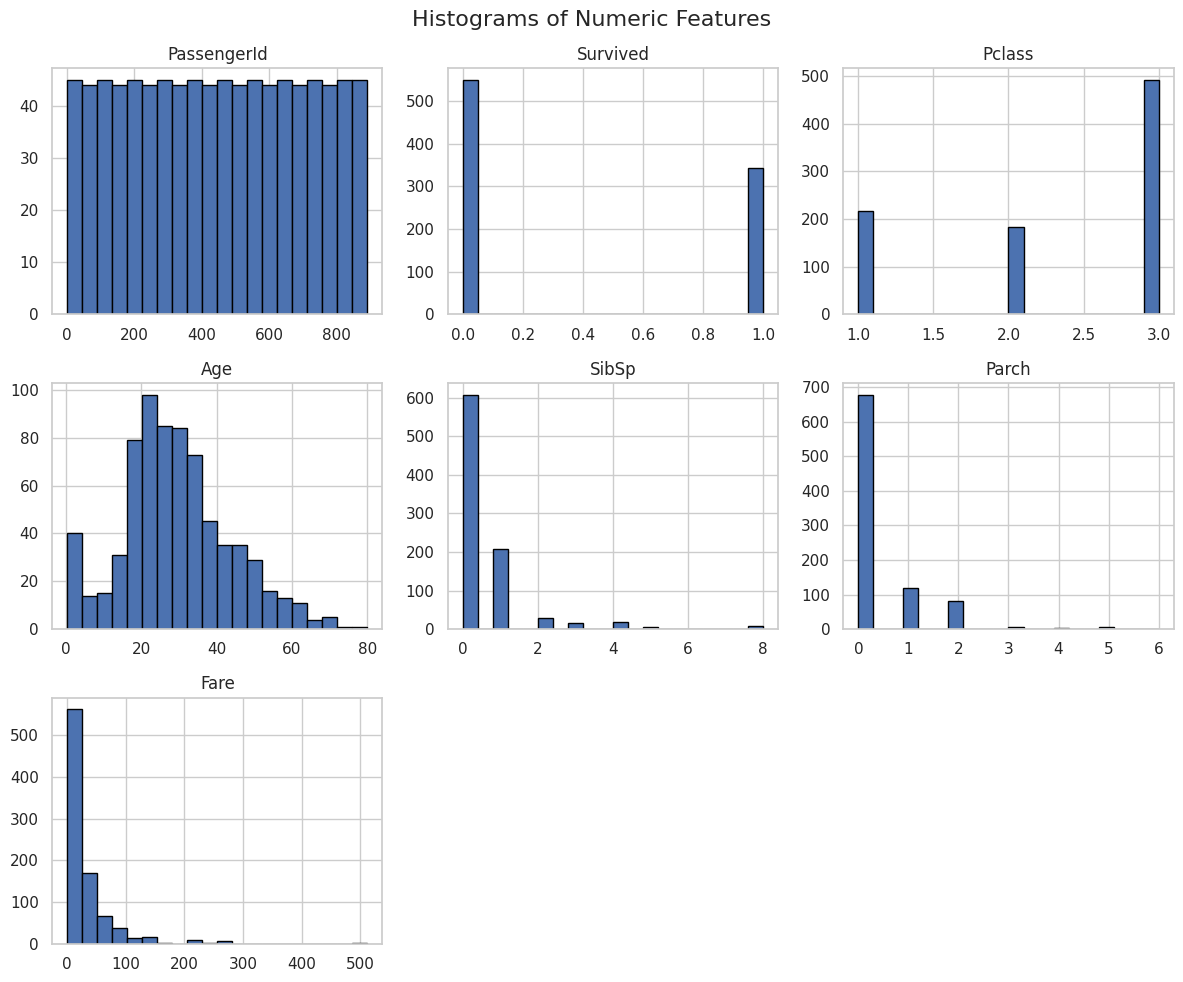

In [14]:
# Histograms for all numeric columns
df.hist(figsize=(12, 10), edgecolor='black', bins=20)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

- Age and Fare show skewed distributions.
- Majority of passengers are in Pclass 3 and did not survive.

## Boxplots to Detect Outliers


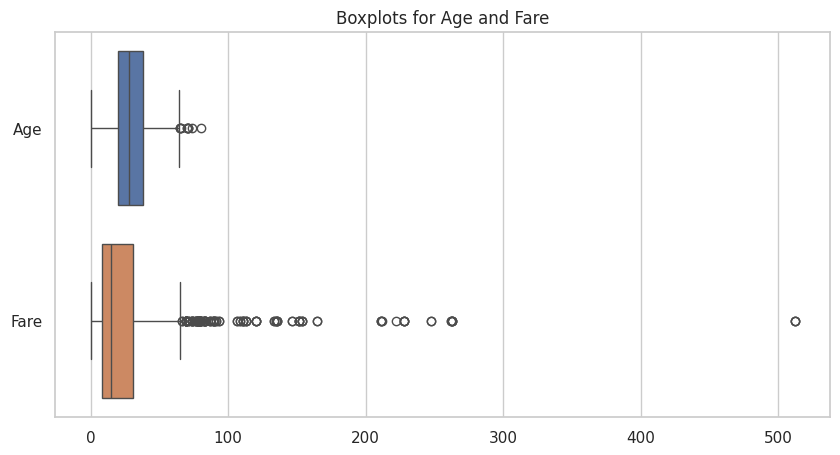

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']], orient="h")
plt.title("Boxplots for Age and Fare")
plt.show()

- Outliers clearly present in 'Fare'; few in 'Age'.

## Step 5: Feature Relationships – Correlation Matrix & Pairplot

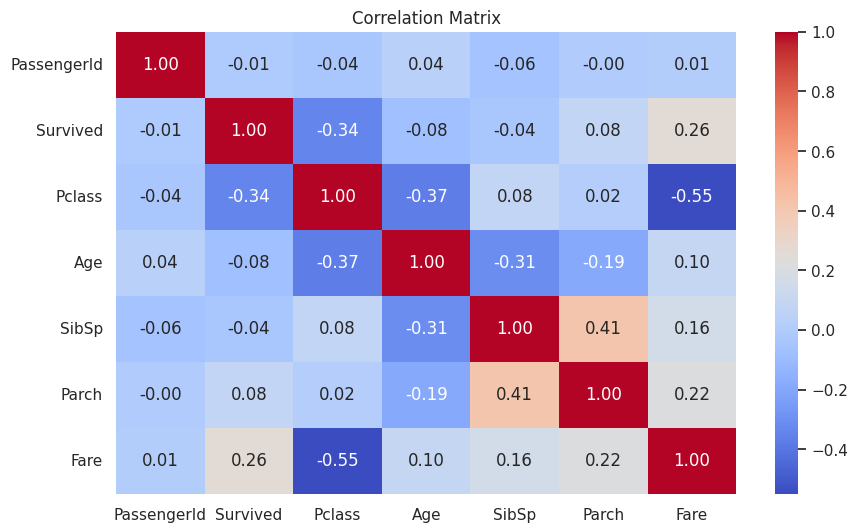

In [17]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- Higher fare → more likely to survive (positive correlation)
- 1st class passengers had better survival chances (Pclass is negatively correlated with survival)

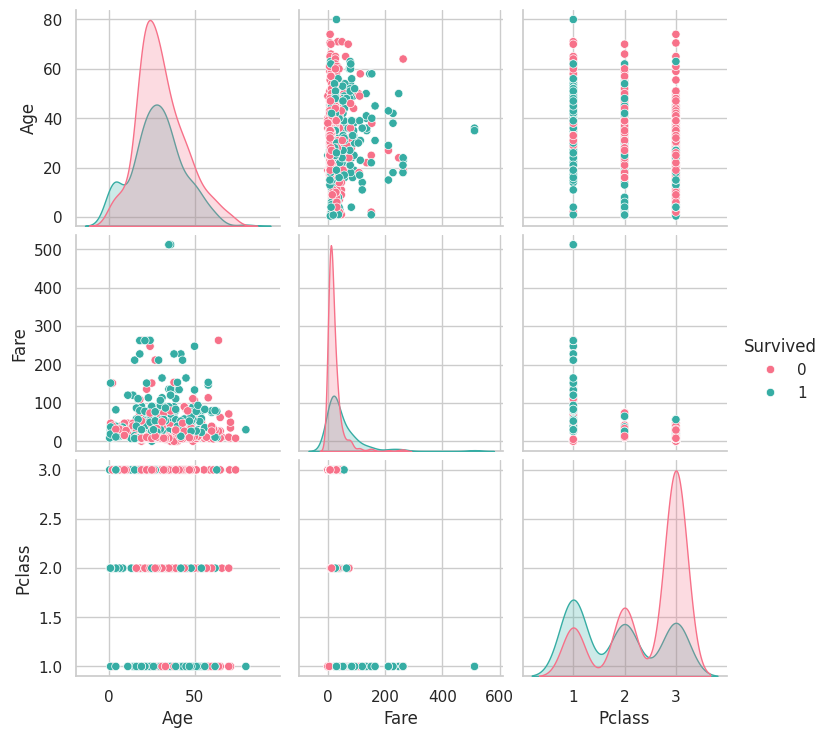

In [19]:
# Pairplot
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']].dropna(), hue='Survived', palette='husl')

- Survivors mostly had higher fares and were in 1st class
- Age didn’t clearly affect survival

## Categorical Analysis (Groupby + Countplot)

In [20]:
# Groupby Tables

# Survival rate by gender
df.groupby('Sex')['Survived'].mean()

# Survival rate by passenger class
df.groupby('Pclass')['Survived'].mean()

# Survival rate by embarkation port
df.groupby('Embarked')['Survived'].mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


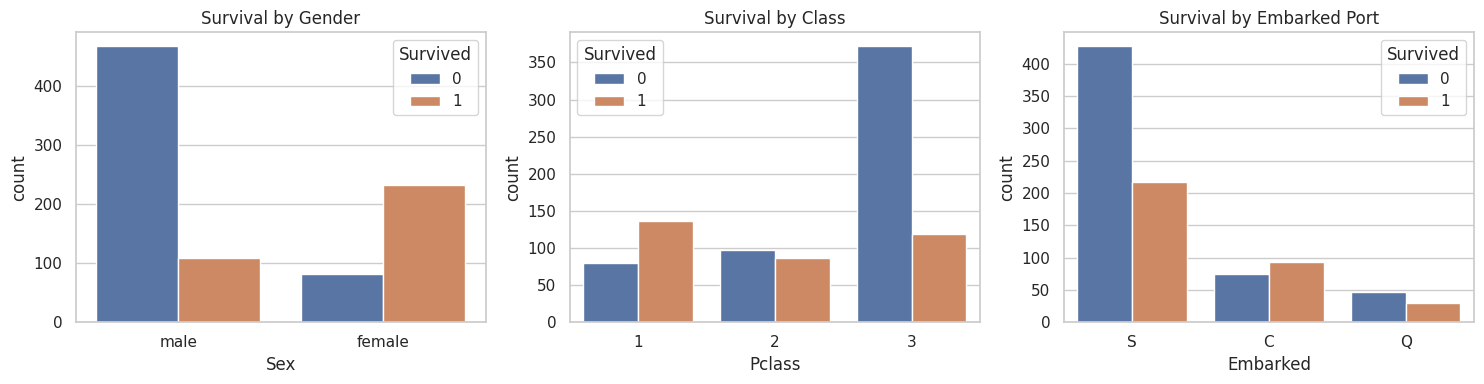

In [21]:
# Countplots

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Class')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarked Port')

plt.tight_layout()
plt.show()


- Females survived more than males. (Survival by Gender)
- 1st class passengers had the highest survival rate. (Survival by Class)
- Passengers from port C had the best chance of survival. (Survival by Embarked Port)

# Bonus Insights

In [27]:
# A. Check for Skewness (pattern/anomaly recognition)
df.skew(numeric_only=True)

,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317
FamilySize,2.727441


- 'Fare' is highly skewed → may require log transformation during modeling.

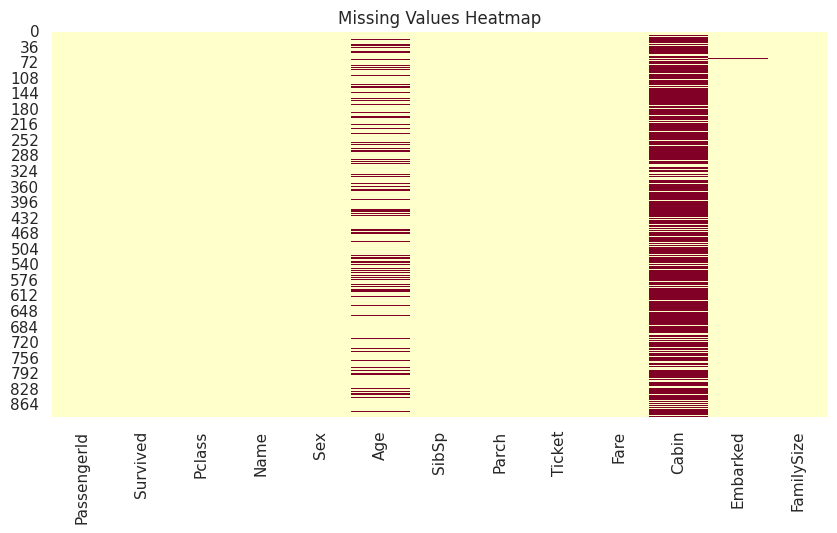

In [28]:
# Visualize missing data (data quality analysis)
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

- 'Cabin' has lots of missing values; others are manageable.

In [29]:
#  Feature Engineering: Family Size (feature-level insight)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [30]:
df[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


- FamilySize can help identify lone travelers vs group travelers — useful for modeling family survival trends..